# Pràctica 2 - OCR de Nombres
## Intel·ligència Artficial
### Autors:
- Jordi Florit Ensenyat
- Pau Girón Rodríguez
### Descripció:
Es demana fer un reconèixedor de nombres escrits a mà. Partim del dataset de dígits 'load_digits'de la llibreria 'sklearn's Aquest dataset conté 1797 mostres (aproximadament 180 de cada digit) , on cada mostra es una imatge en una escala de grisos de 8x8 píxels (vectoritzar en un vector de 64 posicions) on el valor de cada pixel esta dins el rang 0 (negre) - 16 (blanc), cada una de aquestes mostres representa un dígit del 0-9 i esta asociat a una etiqueta corresponent que indica el número que representa la imatge.. Llavonces la pràctica consistirà en realitzar tres parts diferents:
- 1. Comparació del rendiments dels quatre models emprats: regressió logística, perceptró, arbre de decisió i bosc aleatori.
- 2. 2
- 3. l

# Part 1
Configiracio del entorn,introduir els imports de les diferents llibreries de Python que utilitzarem:

In [6]:
# Descomentar la seguent linea per instalar seaborn al entorn de Python. Una vegada instalat es pot tornar a comentar
# !pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, mean_absolute_error, mean_squared_error,
                             classification_report)


# Part 2
Carregam l'objecte *digits* retornat per *load_digits*. Aquest objecte conté diferents atributs entre els que destaquen:
* data: Matriu de (n_samples, n_features) que contenen les caraacterístiques de entrada. Cada fila correspon a una imatge de 8x8 píxels aplanada en una array de longitud 64.
* target: Es un array de longitud n_samples que conté les etiquetes o classes de les imátges. En aquest cas va de 0-9
* target_names: Array que conté el nombre únic de les etiquetes.
* images: Matriu de (n_samples,8, 8) que conté les imatges originals. El mateix que data però amb fortmat de matriu 2D per cada imatge.
* DESCR: Cadena de text que conte una descripció completa del conjunt de dades.

Dimensions de les dades: (1797, 64)
Nombre de etiquetes: 10


<function matplotlib.pyplot.show(close=None, block=None)>

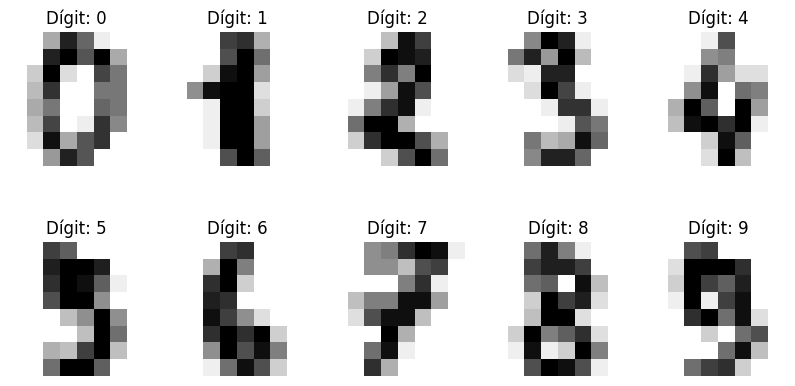

In [2]:
# Cargar el dataset
digits = load_digits()

# Acceder a los datos y las etiquetas
data = digits.data  # Obtener los datos de las imágenes
target = digits.target  # Obtener las etiquetas (números que representan)

# Mostrar alguna informació sobre el dataset
print(f"Dimensions de les dades: {data.shape}")  # Muestra la forma de los datos (número de muestras, número de características)
print(f"Nombre de etiquetes: {len(digits.target_names)}")  # Muestra el número de etiquetas únicas (números de 0 a 9)
# Visualitzar un exemple de cada classe
fig, axes = plt.subplots(2,5,figsize=(10,5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Dígit: %i' %label)
plt.show



Ara dividim les dades en conjunts de entrenament i proves. Els parametres que se han indicat son (A mes introduim les dades y les etiquetes de cada imatge ja separats preaviaments com **data** i **targets**):
* **test_size=0.2** Determina la proporcio del conjunt original que s'utilitzara com conjunt de proves en aquest cas. 20% proves i 80%      entrenament:
* **random_state=42** Aquest parametre deterina la reproducibilitat dels resultats, establint una *seed* per el generador de nombres aleatoris (aquest nombre 42 podria ser qualsevol enter)

El que ens retorna la funció son 4 arrays:
* X_train: Les dades de entrenament. Es un subconjunt de **data** seleccioant aleatoriament depenent dels parametres anteriors mencionats, en aquest cas un 77% de **data**
* X_test: Son les dades de proves. Es el complementari de X_train.
* y_train i y_test: Son les etiquetes corresponents a cada dada dins els arrays X_train i X_test.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1203, 64), (594, 64), (1203,), (594,))

# Exercici Dificultat C
Comparació dels rendiment dels models:
* Regressor logístic
* Perceptró
* Arbre de decisió
* Bosc aleatori

## Regressor logístic
Cream el model i indicam els paràmetres necesaris
(mirar mes endavnat com seleccionar millor els parametres i explicar-los)

In [7]:
#Crear el model
log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

#Entrenar el model
log.fit(X_train, y_train)

#Fer les prediccions
y_pred = log.predict(X_test)

#Calcular la precisió del model
accuracy = accuracy_score(y_test, y_pred)
print("Classification report: \n", classification_report(y_test, y_pred))                        
print(f'Precisió del model: {accuracy}')

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.95      0.95        55
           2       0.96      1.00      0.98        52
           3       0.98      0.96      0.97        56
           4       1.00      0.98      0.99        64
           5       0.95      0.96      0.95        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.93      0.96      0.94        52
           9       0.98      0.96      0.97        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

Precisió del model: 0.9730639730639731


<function matplotlib.pyplot.show(close=None, block=None)>

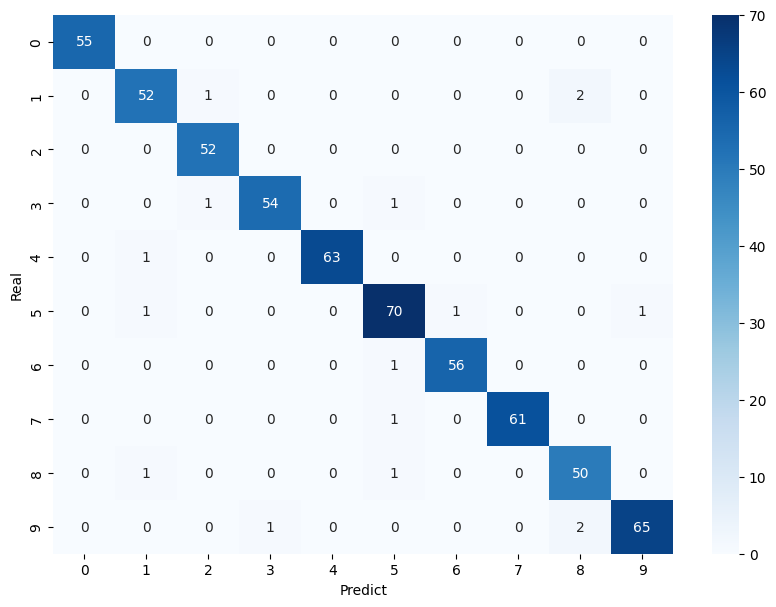

In [5]:
# Crear la matriu de confusió
cm =  confusion_matrix(y_test, y_pred)

#Visualitzar la matriu
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show